<a href="https://colab.research.google.com/github/stevenndungu/AI-ML-Reads/blob/master/Array_Algebra_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Array Algebra

**Authors:** Taliesin Beynon

**Introduction:** Intro here.

**Topics:** numpy, jax, array processing

**Learning objectives:**

* Understand how arrays of number of various sizes and shapes can represent data from the real world
* Manipulate these arrays to perform useful computations
* Understand how shapes of arrays are transformed by these operations
* Detect bugs in existing code
* Choose the right transformations to accomplish a given task.

# Installation and imports

In [2]:
## Install and import anything required. Capture hides the output from the cell. 
#@title Install and import required packages. (Run Cell)

import os 

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap

import matplotlib.pyplot as plt
import numpy as np

import scipy.misc

# Working with image arrays

Our first set of examples will focus on manipulating arrays that represent images. We'll begin by loading an example
image array from the SciPy library:

In [3]:
image_array = scipy.misc.face()

As with any array, we can ask what *shape* it is -- how many axes does it have, and what are their sizes? We can obtain
this information using the `.shape` property:

In [ ]:
image_array.shape

(768, 1024, 3)

We can see it has 3 **axes**, with **sizes** 768, 1024, and 3. That means the number of **cells** in the array is 768 ×
1024 × 3 = 2,359,296. Each cell in the array contains a number, which we can access by providing the **address** of the
cell. Here's the number at address 0,0,0, which we look up using the `[…]` syntax:

In [ ]:
image_array[0,0,1]

112

The maximum and minimum values that are present in the entire array can be found with the `min` and `max` methods:

In [ ]:
(image_array.min(), image_array.max())

(0, 255)

Values in the range 0 … 255 represent the brightness of the image at a particular horizontal and vertical positions --
we call this a **pixel**. Let's now *show* this image using the `imshow` function:

In [ ]:
plt.imshow(image_array)

As you can see the horizontal positions range from 0 to 1024, and the vertical positions from 0 to 768. It's a general
convention that the vertical positions by the **first** axis of the array (the **rows**), and the horizontal positions
are encoded by the **second** axis of the array (the **columns**).

We can demonstrate this by **slicing** the array along the first axis, so that we take only rows 250 to 375:

In [ ]:
sliced_image_array = image_array[250:375]
sliced_image_array.shape

(125, 1024, 3)

Notice there are now only 375 - 250 = 125 rows in this new array. Let's plot this sliced array. We can see we've got an
image that shows only a vertical section of the original iamge:

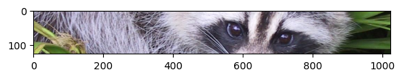

In [ ]:
plt.imshow(sliced_image_array)

We can similarly slice the array horizontally. Let's do both vertical and horizontal slicing. Notice that the vertical
slice information is the **first argument** to `[…]` and the horizontal slice information is the **second argument**,
because the *n*'th argument is applied to the *n*'th axis:

In [ ]:
sliced_image_array = image_array[250:375, 500:800]
plt.imshow(sliced_image_array)

**Task**: Modify the code below to display only the nose of the raccoon!

In [ ]:
plt.imshow(image_array[250:375, 500:800])

### Color channels

The third axis of these arrays has size 3. This axis represents the **color channel**. Cells in the first address of
this axis represent amounts of **red light**, cells in the second **green light**, and cells in the third **blue
light**. Different mixtures of these light amounts produce all the colors a computer screen can display.

For example, we can form the color **yellow** as an equal mix of **red** and **green** light. Here we demonstrate this
by creating a 1 × 1 × 3 array, representing an image containing a single pixel. We fill this array with equal amounts of
red and green light:

In [ ]:
def plot_color(r, g, b):
  return plt.imshow([[[r,g,b]]])
plot_color(255, 255, 0)

**Task**: Modify the call to `plot_color` below to produce a pink image:

In [ ]:
plot_color(255, 255, 0)

We will now copy our original image array, and modify it to change some of the pixel values. We're going to modify the
noise of the racoon to be blue. To do this, we'll *set* values of part of the array corresponding to the nose.

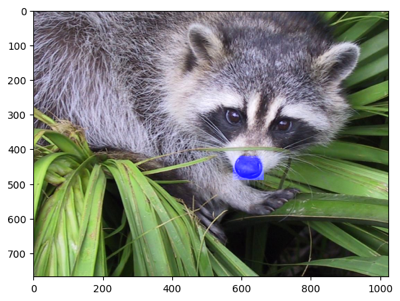

In [ ]:
clown_image_array = image_array.copy()
clown_image_array[420:490, 575:665, 2] = 255
plt.imshow(clown_image_array)

We changed a particular slice of the array, setting it to the maximum value. This slice corresponded to the red channel
of a rectangle of pixels around the raccoon's nose.

**Task**: It was recentlty discovered that the raccoon in this image was an important witness in a state investigation into illegal logging. For this reason, we need to protect the identity of the racoon by censoring its eyes. Modify the code below to replace the section around its eyes with a black rectangle.

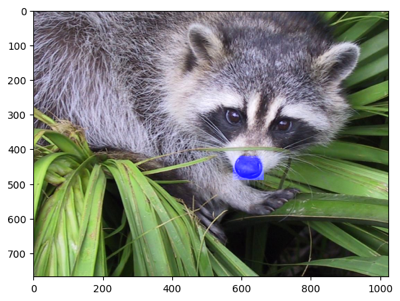

In [ ]:
witness_protection_array = image_array.copy()
witness_protection_array[420:490, 575:665, 2] = 255
plt.imshow(witness_protection_array)

### Tinting an image

We can modify the amounts of color in the racoon array by multiplying the color channels with a 1 × 1 × 3 array that
represents the factor with which to multiply each channel. Let's double the brightness of the blue channel, and keep the
other channels the same:

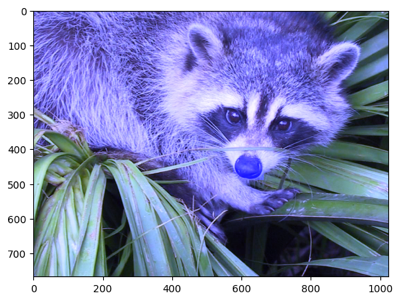

In [ ]:
plt.imshow(clown_image_array * np.array([[[1, 1, 2]]]))

We received a warning because the brightness values of the blue channel now exceeds 255, which is the maximum amount of
brightness that can be displayed. These >255 values will still be intepreted as 255 for plotting purposes. Notice also
that the color of the green leaves didn't change much, because they don't have much blue light in them to begin with!

**Task**: Modify the code below to multiply the **green** channel by a factor of 2 instead of the blue channel:

In [ ]:
plt.imshow(clown_image_array * np.array([[[1, 1, 2]]]))

### Grayscale images

We've seen that images with three color channels are **color** images, with the color channel corresponding to the $3^{\textrm{rd}}$
axis of the array. If an image array does not have a $3^{\textrm{rd}}$ axis, then we do not have color information, and we call this a
**grayscale** image.

Let's extract only the **green** color channel of our racoon using slice notation `[…]` to obtain a grayscale image:

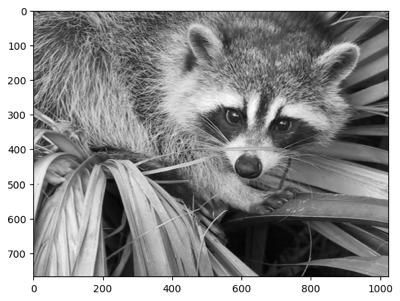

In [ ]:
def plot_grayscale(array):
  return plt.imshow(array, cmap='binary_r')
plot_grayscale(clown_image_array[:, :, 1])

The slice `[:, :, 1]` requested all rows  and all columns of the original array, but only the second (green) color
channel.

**Task**: Modify the code below to plot the **blue** color chanel of the original image as a grayscale image. You should see that the *leaves* are darker in the grayscale image derived from the blue color channel than the grayscale image derived from the green color channel, because of course leaves reflect mostly green light! The *nose* of the raccoon should appear bright white, since we set it's blue channel to have the maximum value earlier.

In [ ]:
plot_grayscale(clown_image_array[:, :, 2])

How do we obtain a single grayscale image that incorporates the brightness values from **all** three color channels,
rather than taking only one at a time?

To do this, we want to *total* amount of light at a given position in the image, irrespective of whether it is red,
green, or blue light. Therefore, we wish to *sum* over the third axis -- the color channel axis. Recall that axes, like
most things in Python, start counting at 0, so the third axis corresponds to `axis=2`.

In [ ]:
plot_grayscale(clown_image_array.sum(axis=2))

When taking photographs with old-fashioned cameras, it is important to know the total amount of light that is coming
into the camera's lens, so that we can set the **exposure** correctly.

We'll now do a similar thing with our image. We wish to find the average amount of light that is present in the image.
To do this, we wish wish to average over the horizontal **and** vertical **and** color channel axes. We'll use the
`mean` method to do this:

In [ ]:
image_array.mean(axis=(0,1,2))

110.16274388631184

**Task**: Modify the code below to calculuate the average amount of light in the **clownified** raccoon image. Before you evaluate the code, predict whether this mean value should be larger or smaller than the mean value above, and by roughly how much.

In [ ]:
image_array.mean(axis=(0,1,2))

We can also calculate the average **color** of an image. To do this, we will simply avoid summing over the color
channel, so that we get an average green, average blue, and average red amount of light that we can then interpret as an
average color. Run the code below:

In [ ]:
image_array.mean(axis=(0,1))

array([110.67604192, 117.72977066, 102.08241908])

**Task**: Modify the call to `plot_color` below to visualize the average color that you computed above. It should appear slightly green, because the image consists of mostly green leaves and a mostly black-and-white raccoon:

In [ ]:
plot_color(0, 0, 0)

### TODO: Averaging over a list of images.

### TODO: Step index as a way of downscaling.

### TODO: Talk a little about slicing explicitly.

# Slicing

In the previous section, we dealt with an color image array, which is an array with 3 *axes*, which we call a
**3-array**.

The first two axes were **spatial**: they represented the horizontal and vertical arrangement of pixels. The sizes of
these axes corresponded to the **number of pixels** in the horizontal and vertical directions of the image.

The third axis of an image array is quite different, since it represents **color**, with the size being 3 because there
are 3 color channels that, when mixed together, allow us to display most of the colors that are visible to humans.

In this section, we're going to be a little more explicit with slicing, and take you through the theory.

Let's play with a simple image that illustrates this. It will be a 5 × 4 color image that depicts a capital letter "F",
in pink on a black background. We show this below:

In [ ]:
f_array = np.array([
	[[0,0,0],[1,0,1],[1,0,1],[1,0,1]],
	[[0,0,0],[1,0,1],[0,0,0],[0,0,0]],
	[[0,0,0],[1,0,1],[1,0,1],[0,0,0]],
	[[0,0,0],[1,0,1],[0,0,0],[0,0,0]],
	[[0,0,0],[1,0,1],[0,0,0],[0,0,0]]
])
plt.imshow(f_array * 255)

The image array is a 5 × 4 × 3 array:

In [ ]:
f_array.shape

(5, 4, 3)

We can visualize this 3-array using a 3 dimensional "cube diagram", where each cube represents a cell of the image
array. Here we will draw the cube as **solid** if the value of cell is **1**, and as empty if the value of the cell is
**0**. We will also draw cells that live in the red color channel as red, cells in the green channel as green, etc.

Since pink is the color sum of red and blue, we will can that there are only two channels in which **1**s are present:

<center>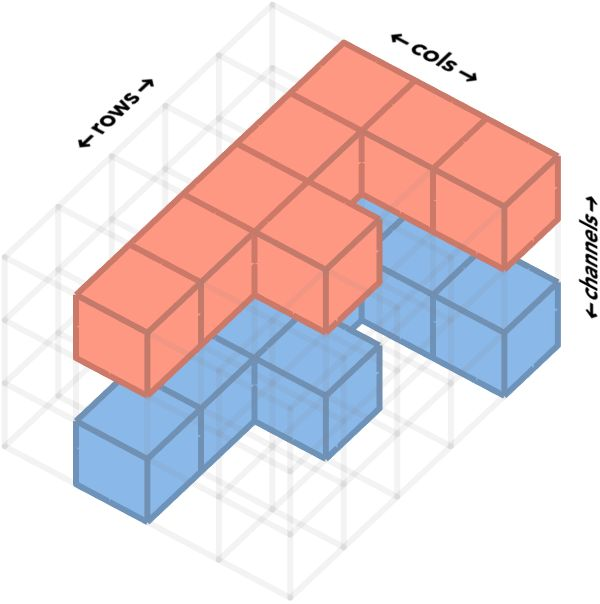</center>

Notice that the shape of 3-array is 5 × 4 × 3, and the axes are therefore in the order: **rows**, **columns**,
**channels**.

## Specifying one axis

The first kind of slicing we will do is just to **specify** an index for a specific, single axis in the 3-array. This
will select all cells that have that index. The result will be a 2-array whose axes are the ones we did **not** specify.
Let's look at an example.

Let's specify the first axis, which is the **rows** axis. If we select the **first row** from the 5 × 4 × 3 sized
3-array, we obtain a 4 × 3 sized matrix whose axes correspond to the **columns** and **color channels**:

<center></center>

We can perform this operation in **numpy** using by specifying the row we want in the first position of the slice
`[...]` notation, and specifying the other axes as `:`, which means *take all indices* in that axis. Here we are
selecting the first row, which is indexed as **0** in Python:

In [ ]:
f_array[0, :, :]

array([[0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

**Task**: Explain why the pattern of 0s and 1s in the above array corresponds to the slice shown in the cube diagram above.

Similarly, if we slice a particular **column** from this 3-array, we obtain a 4 × 3 matrix (aka 2-array) whose axes
correspond to the **rows** and **color channels**. Here we select the **third** column:

<center></center>

In **numpy**, we are now selecting a particular index (specifically 2) in the column axis, which is the **second** axis.

In [ ]:
f_array[:, 2, :]

array([[1, 0, 1],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0]])

**Task**: Again, explain why the pattern of 0s and 1s in the above array corresponds to the slice shown in the cube diagram above.

If we slice a particular **channel** from this 3-array, we obtain a 3 × 3 matrix (aka 2-array) whose axes correspond to
**rows** and **columns**.

<center>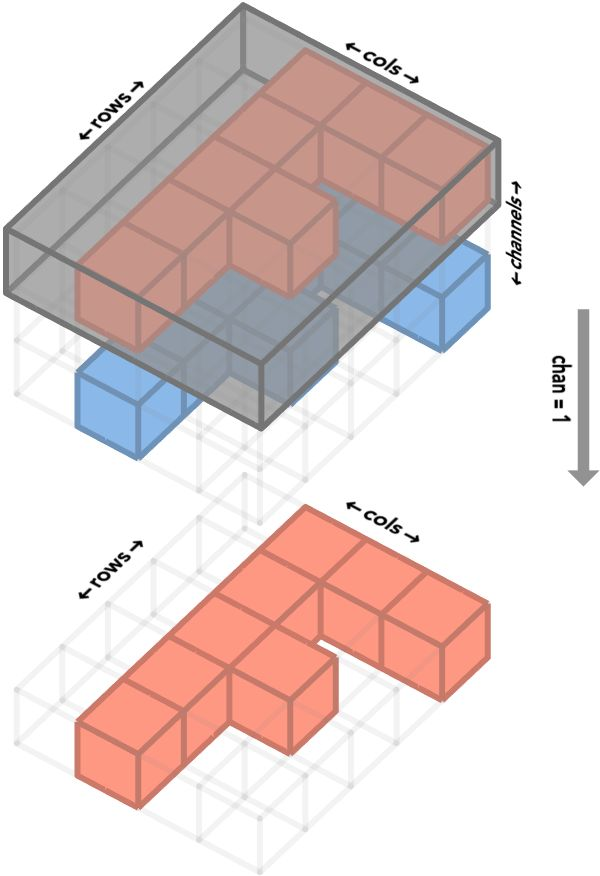</center>

In **numpy**, we are now selecting a particular index (specifically 0) in the color channel axis, which is the **third**
axis.

In [ ]:
f_array[:, :, 0]

array([[0, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

**Task**: Modify the code below to obtain the matrix corresponding to the **green** color channel. Predict before you run the code what the output will be.

In [ ]:
f_array[:, :, 0]

## Specifying two axes

We can also produce a single **vector** (aka 1-array) by specifying both a particular **row** and a particular **color
channel**. This leaves only the **columns** axis unspecified, meaning the result has just this one axis, and is hence a
1-array.

<center></center>

In **numpy**, we are specifying a value for the row ($1^{\textrm{st}}$ axis) **and** channel ($3^{\textrm{rd}}$ axis):

In [ ]:
f_array[0, :, 0]

array([0, 1, 1, 1])

**Task**: Modify the code below to obtain the vector corresponding to last **green** color channel for the **last** row of the image. Predict before you run the code what the output will be.

In [ ]:
f_array[0, :, 0]

There are **two** other combinations of axis we can slice: **row and column** (which leaves color channel unsliced), and
**column and color channel** (which leaves row unsliced). Let's examine slicing the row and column:

<center></center>

This corresponds to taking a single **pixel** from the image, since we are left only with color information.

In **numpy**, we are specifying a value for the row ($1^{\textrm{st}}$ axis) **and** column ($2^{\textrm{nd}}$ axis):

In [ ]:
f_array[2, 2, :]

array([1, 0, 1])

**Task**: Modify the code below to obtain the vector corresponding to colors for the bottom-right pixel of the image. Predict before you run the code what the output will be.

In [ ]:
f_array[2, 2, :]

## Specifying three axes

Lastly, we can specify all three axis. This corresponds to taking the value of a color channel for a single pixel. After
we specify *all* the axes, there are no axes left, and so we obtain a **scalar value**. This is effectively a
**0-array**, an array with no axes, and hence only one possible cell.

<center></center>

In **numpy**, we are specifying a value for the row ($1^{\textrm{st}}$ axis) **and** column ($2^{\textrm{nd}}$ axis) **and** channel ($3^{\textrm{rd}}$ axis):

In [ ]:
f_array[2, 2, 0]

1

**Task**: Modify the code below to obtain the value corresponding to the blue channel of the top, left pixel. Predict before you run the code what the output will be.

In [ ]:
f_array[2, 2, 0]

## Sub-arrays

As we saw earlier, we are not limited to specifying a **single** index for an axis. We can also specify a **range** of
indices. By doing this, we do **not** remove that axis from the result, since there are now multiple cells within that
range on that axis.

Let's take the $2^{\textrm{nd}}$ through $3^{\textrm{rd}}$ columns, and the $2^{\textrm{nd}}$ through 4th rows, but only take the first two colors channels (red and
green):

<center></center>

In **numpy**, we achieve this using the notation `start:stop`. Note that the `start` is *inclusive*, but the stop is
*exclusive*, so `1:4` means taking indices `1,2,3`:

In [ ]:
f_array[1:4, 1:3, 0:2]

array([[[1, 0],
        [0, 0]],

       [[1, 0],
        [1, 0]],

       [[1, 0],
        [0, 0]]])

This array is a little hard to read, so we'll instead show **only** the red color channel, which makes the little shape
"T" above easier to see:

In [ ]:
f_array[1:4, 1:3, 0]

array([[1, 0],
       [1, 1],
       [1, 0]])

You might have noticed we've been using the syntax `:` to mean take the entire range from beginning to end -- if either
start of stop is left off, the meaning is to start / stop at the beginning / end of that axis.

**Task**: Predict the shape of the array that is produced by the code below. After you've done that, predict the values that will be produced. Then check your answer by running the code!

In [ ]:
f_array[1, 1:4, 2]

# Transposing

## Transposing the first two axes:

### Transposing a row vector to a column vector:

<center></center>

<center></center>

### Transposing a matrix:

<center></center>

### TODO: put shape labels on all these, write text and exercises

<center>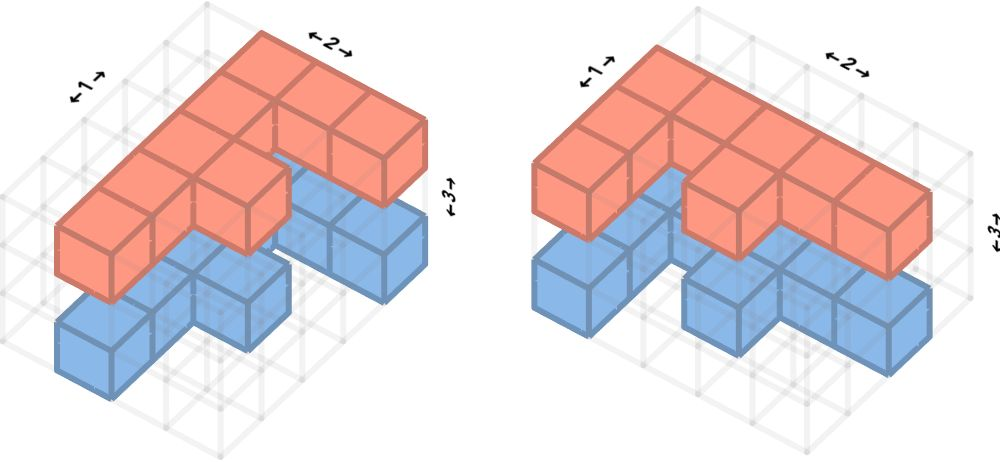</center>

## Transposing the second and third axes

<center>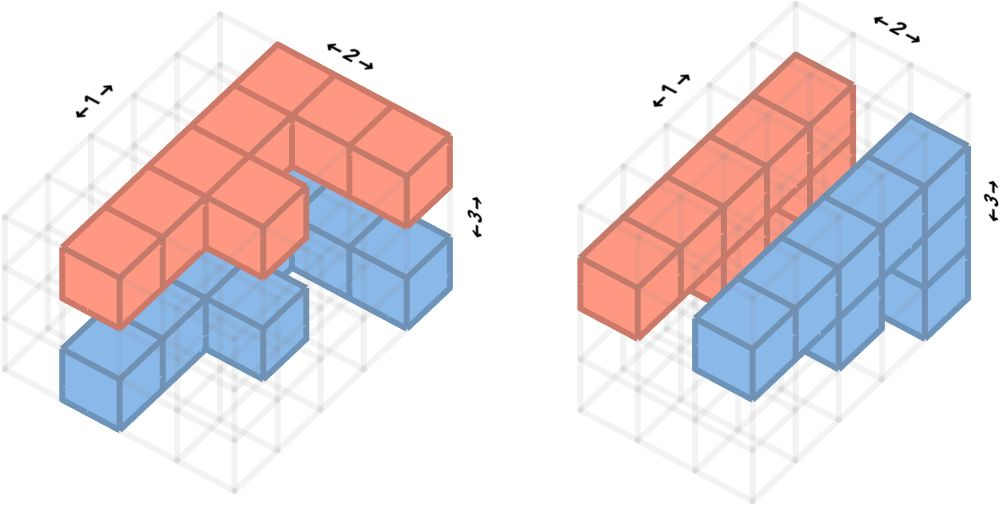</center>

## Transposing as simply reordering axes:

<center></center>

# Combining arrays

### Elementwise operations

If we have multiple arrays of the same shape, it is possible to combine them as if they were numbers. For example, we
can add two arrays, or multiply them, or subtract them. The way we do this is very straightforward: we simply add the
*ordinary* numbers in the corresponding cells. This is called an **elementwise** operation, since it is matches
**elements** of each array with each-other.

We'll illustrate this with two vectors. We'll think of these as *column vectors*. All this means is that we are thinking
of the vector as being a **column** of numbers, meaning that each cell is in a different **row**. This *intepretation*
isn't part of numpy, or part of the code at all, but it is a helpful interpretation for us as humans, since it allows us
to draw the vector in two dimensions, in a **square diagram**:

<center></center>

Here is the **numpy** code that creates these two vectors, which we'll name `r` (for red) and `b` (for blue). Run this
code:

In [ ]:
r = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])
print(r.shape, b.shape)

Notice that both vectors have the same shape, which is a 1-tuple containing 4, since there is a single axis with 4 cells
in it.

We can **add** these two vectors by simply adding the numbers in the corresponding cells, as follows:

<center></center>

In [ ]:
r = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])
r + b

array([11, 22, 33, 44])

**Task**: Modify the code below to subtract 1/10 of the `b` vector from the `a` vector. What will you get?

In [ ]:
r + b

### Combining matrices

We can also combine two matrices. Let's again create an `rm` matrix and `bm` matrix corresponding to these:

<center></center>

In [ ]:
rm = np.array([[1, 2], [3, 4]])
bm = np.array([[1, 0], [0, 1]])
print(rm.shape, bm.shape)

Addition again works elementwise:

<center>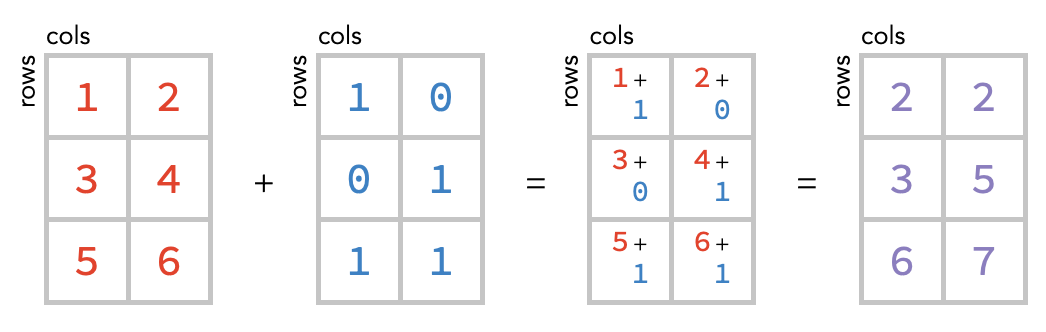</center>

**Task**: Modify the code below to add the `rm` matrix to the `bm` matrix:

In [ ]:
r + b

### Broadcasting

Interestingly, however, we can combine arrays that do *not* have exactly the same shape. This is easiest to explain
visually.

Here's the basic concept, which we will shortly explain:

<center></center>

Notice the red matrix has both a **row** and **column** axis, but the blue vector only has a **row** axis. It is
*missing* a column axis. So how do we match up the cells of the two arrays? The solution is simple: we treat the blue
array as *unchanging* across these columns, so we can simply repeat the value it has in a given row -- these repeated
values as shown above in green.

In other words, we have made the following change when evaluating the sum:

<center></center>

This kind of operation, in which we *fill in* missing axes by simply repeating the values of cells, is know
**broadcasting**. Here's the broadcast operation depicted on its own, where we broadcast to create a new axis with size
3, turning the vector into a matrix:

But notice there is a *second* way we could broadcast a vector to form a matrix:

<center></center>

If we use this second way, then the sum would come out differently:

<center></center>

How are we to decide between these two possibilities, which we show again below?

<center></center>

The answer is that we have to *tell* numpy whether we want to consider a **vector** as a **column vector** or a **row
vector**. We do this by taking the 1-array, which has only 1 axis ("rows"), and inserting a *new* axis either before or
after the existing axis: There are two ways we can then do this:

<center>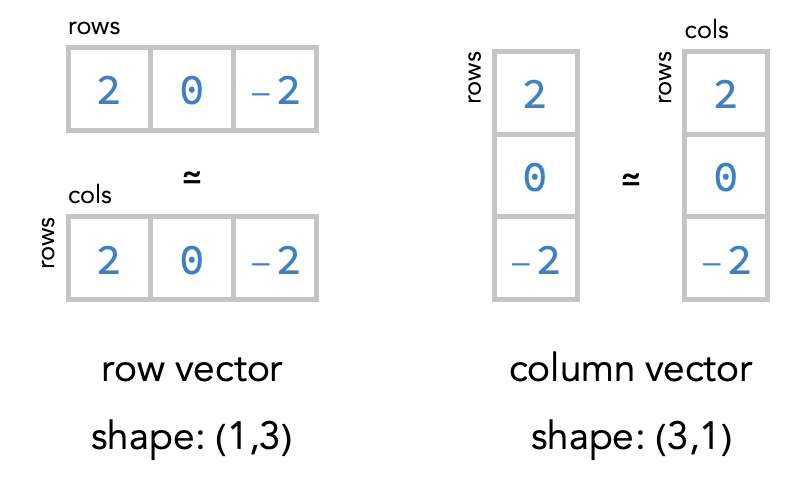</center>

### TODO: examples of inserting one dimensions, and collapsing them with squeeze

### TODO: put "shape labels" into all diagrams, illustrate broadcasting as operating on shapes directly

### TODO: Assembling vectors into matrices

# Aggregating arrays

### TODO: Add exercises for this!

Aggregation is the process of removing axes of an array by using an **aggregation function** that can turn multiple
values into a single value. A very common and useful example of an aggregation function is `sum`, which takes a list of
values and returns their sum. `sum` is built-in to Python:

In [ ]:
sum([1,2,3,4,5])

15

Another useful example is `max`, which gives the largest out of all the values in the list:

In [ ]:
max([1,2,3,4,5])

5

In general, all aggregation functions take a collection of inputs of some kind and produce a single output. But there
are different ways to apply an aggregation function to an array.

For example, let's take the following matrix:

<center></center>

We could sum together *all* values of this matrix, producing the scalar  `0 + 1 + 2 + 3 + 10 + 11 + 12 + 13 = 52`.

Here we highlight all the cells that are summed together:

<center></center>

Alternatively, we could sum together each *column* of the matrix. There are 4 columns so there will be 4 sums. One
alternative way to think about this is that we are summing the rows together **elementwise**. There are two rows so we
are summing two vectors, each of size 4:

`[0, 1, 2, 3] + [10, 11, 12, 13] = [10, 12, 14, 16]`.

Here we highlight the fact that adding rows will involves summing cells that *share* a column:

<center>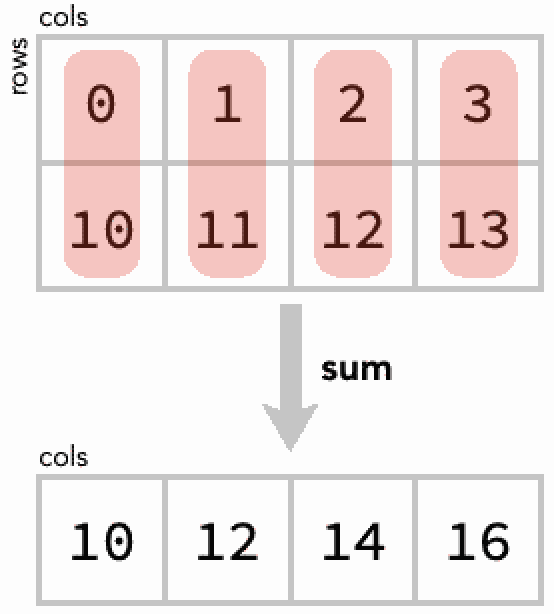</center>

Lastly, we could sum together each *row* of the matrix. There are 2 rows so there will be 2 sums. Again, we can think of
this as summing elementwise 4 column vectors, each of size 2:

`[0, 10] + [1, 11] + [2, 12] + [3, 13] = [6, 46]`

Here we highlight that summing columns involves summing cells that share the same row:

<center></center>

In each of these cases, we are forming **collections** of cells, then feeding each collection to the aggregation
function `sum`. The function `sum` is run once for each such collection, and produces a result that goes in a cell of
the new array.

This suggests a general way to conceptualize aggregation: an aggregation consists of **collect** step and an **apply**
step.

In the **collect** step, we form make a new array whose cells are collections of cells from the original array. This
**collected** array will always have a shape with fewer axes than the original array -- those axes we collect are now
"within" each cell.

Here, for example, we collect *across* rows, so the collected array doesn't have multiple rows anymore:

<center>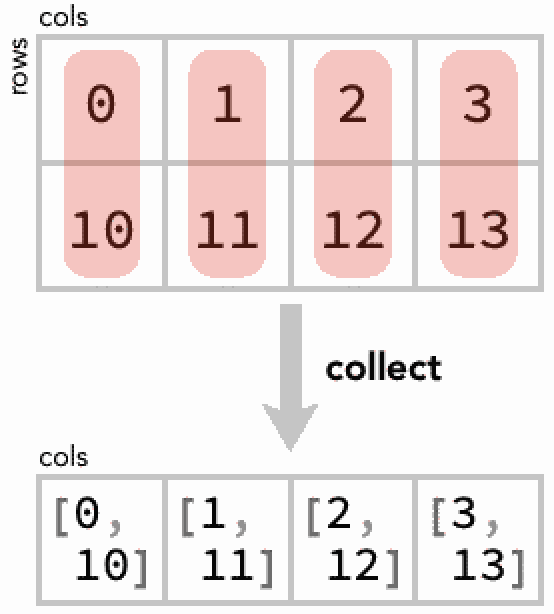</center>

In the **apply** step, we apply the chosen aggregation function (sum in this case) to the collected values in each cell,
and obtain an array of the *same* shape:

<center></center>

Let's see this in action for the other two aggregations:

<center></center>

Notice an important, if obvious, fact: if we sum either the the row or column sums, we get the full matrix sum:

<center>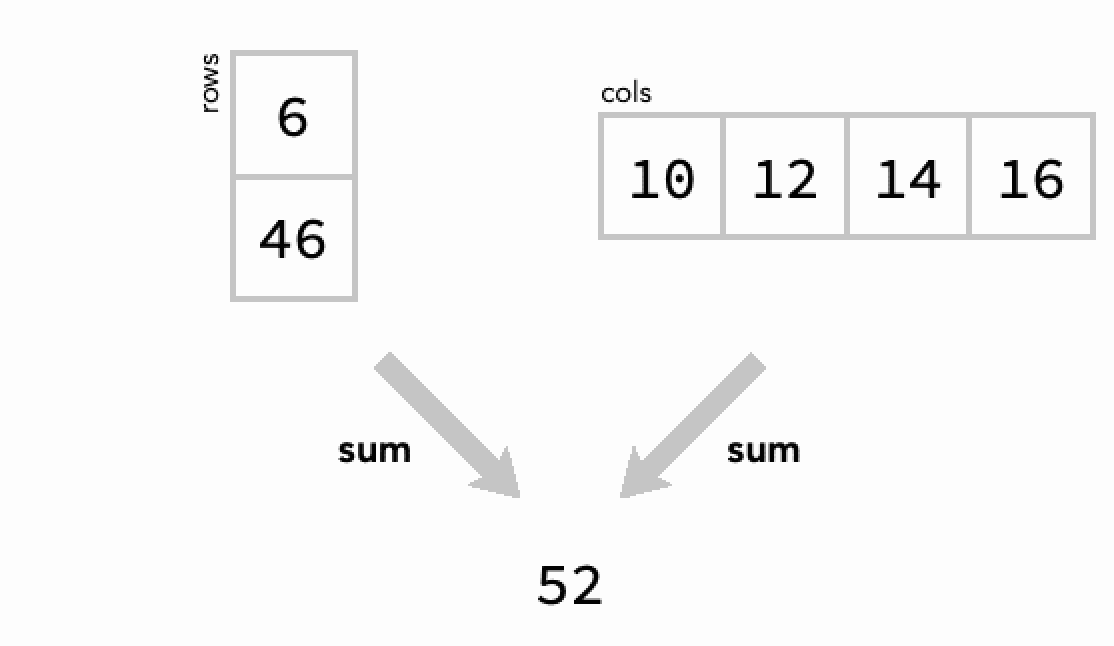</center>

We can then see the full "geometry" of how one can start with a matrix, and successively sum over rows or columns or
both to end at a single scalar value:

<center></center>

### TODO: Mention key point: doesn't matter what order you sum things. (Associativity)

# Dot products

### Hadamard product between two vectors

<center>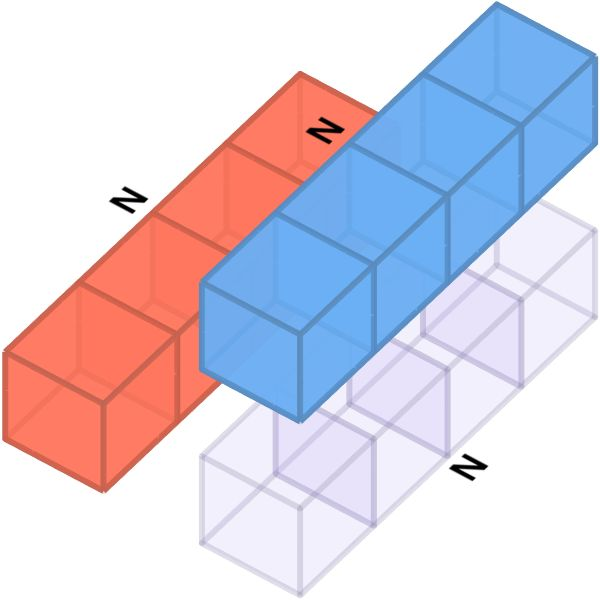</center>

### Red and blue are multiplied to produce purple:

<center></center>

### Sum over this dimension:

<center>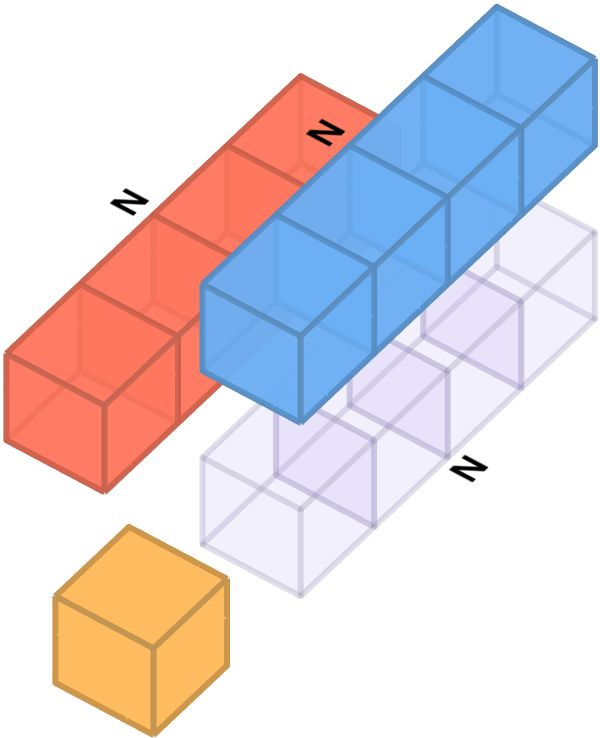</center>

### TODO: Explain this is the inner product between two vectors.

### "Shared" product between two matrices:

<center></center>

<center></center>

<center></center>

<center></center>

### TODO: explaine this is the dot product between two matrices.

# Spot the bug

### TODO: come up with some exercises

# Predict the shape

### TODO: come up with some exercises